In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Activation, Dropout, Dense, Conv2D, MaxPooling2D, Convolution2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
print(os.listdir("../input"))

Using TensorFlow backend.


['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
X = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

Y = X["label"]
X.drop(["label"], inplace=True, axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values , test_size=0.3, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print("X train after split", X_train.shape)
print("X test after split", X_test.shape)
print("Y train after split", Y_train.shape)
print("Y test after split", Y_test.shape)

X train after split (29400, 28, 28, 1)
X test after split (12600, 28, 28, 1)
Y train after split (29400,)
Y test after split (12600,)


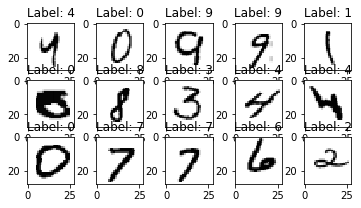

In [3]:
images_with_labels = list(zip(X_train, Y_train))
for index, (image,label) in enumerate(images_with_labels[:15]):
    plt.subplot(4, 5, index+1)
    plt.imshow(image.squeeze(), interpolation='nearest', cmap='gray_r')
    plt.title('Label: %i' % label)

In [4]:
model = Sequential()
model.add(Convolution2D(input_shape=(28, 28, 1), filters=64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [5]:
outs = model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.3, validation_data=(X_test, Y_test))

Train on 29400 samples, validate on 12600 samples
Epoch 1/10
29400/29400 [==============================] - 8s 273us/step - loss: 0.4369 - acc: 0.8690 - val_loss: 0.1441 - val_acc: 0.9592
Epoch 2/10
29400/29400 [==============================] - 5s 181us/step - loss: 0.1461 - acc: 0.9620 - val_loss: 0.1108 - val_acc: 0.9713
Epoch 3/10
29400/29400 [==============================] - 5s 177us/step - loss: 0.1170 - acc: 0.9697 - val_loss: 0.1074 - val_acc: 0.9704
Epoch 4/10
29400/29400 [==============================] - 5s 178us/step - loss: 0.0943 - acc: 0.9757 - val_loss: 0.1121 - val_acc: 0.9729
Epoch 5/10
29400/29400 [==============================] - 6s 190us/step - loss: 0.0864 - acc: 0.9783 - val_loss: 0.0885 - val_acc: 0.9758
Epoch 6/10
29400/29400 [==============================] - 6s 198us/step - loss: 0.0756 - acc: 0.9805 - val_loss: 0.1009 - val_acc: 0.9760
Epoch 7/10
29400/29400 [==============================] - 5s 180us/step - loss: 0.0724 - acc: 0.9830 - val_loss: 0.0926 - 

In [6]:
arr_outs = outs.history
acc = arr_outs['acc']
val_acc = arr_outs['val_acc']
loss = arr_outs['loss']
val_loss = arr_outs['val_loss']

range(1, 11)


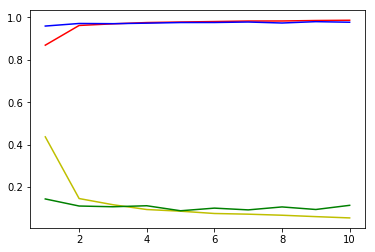

In [7]:
epochs = range(1, len(acc)+1)
print(epochs)
plt.plot(epochs, acc, label='Training Accuracy', color='r')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='b')
plt.plot(epochs, loss, label='Training Loss', color='y')
plt.plot(epochs, val_loss, label='Validation Loss', color='g')

In [8]:
scores = model.evaluate(X_test, Y_test, verbose=10)
print(scores)
test_loss = scores[0]
test_acc  = scores[1]

[0.11409308229034072, 0.9772222222222222]


In [9]:
test_data = test.values.reshape(test.shape[0], 28, 28, 1).astype('float32')
result = model.predict(test_data)
print(result.shape)
result = np.argmax(result, axis=1)
result = pd.Series(result, name="Label")
print(result)

(28000, 10)
0        2
1        0
2        9
3        9
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64
